In [395]:
import cv2
import json
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False

# 一、数据载入和预处理

## 1. 读取数据

#### 读取标题

In [398]:
with open("/home/geoffrey/我的坚果云/足球运动员分析.ipynb", encoding='utf-8') as f:
    data = json.load(f)
data = data["cells"][2]['source'][2:]
for i in range(len(data)):
    data[i] = data[i].strip(r'\* n').strip().split()
title = pd.DataFrame(data)
title

,0,1
0,Name,姓名
1,Nationality,国籍
2,National_Position,国家队位置
3,National_Kit,国家队号码
4,Club,所在俱乐部
5,Club_Position,所在俱乐部位置
6,Club_Kit,俱乐部号码
7,Club_Joining,加入俱乐部时间
8,Contract_Expiry,合同到期时间
9,Rating,评分


#### 读取数据

In [399]:
df = pd.read_csv('/home/geoffrey/我的坚果云/FullData.csv', header=0, names=title[1])
# display(df.sample)
df.shape

(17588, 53)

## 2. 缺失值处理

#### 查看无效值

In [400]:
df.notnull().all()

姓名           True
国籍           True
国家队位置       False
国家队号码       False
所在俱乐部        True
所在俱乐部位置     False
俱乐部号码       False
加入俱乐部时间     False
合同到期时间      False
评分           True
身高           True
体重           True
擅长左（右）脚      True
出生日期         True
年龄           True
擅长位置         True
工作效率         True
非惯用脚使用频率     True
技术等级         True
控球技术         True
盘球（带球）能力     True
盯人能力         True
铲球           True
逼抢能力         True
攻击能力         True
反击           True
攻击性跑位        True
抢断           True
视野           True
镇静           True
下底传中         True
短传           True
长传           True
加速度          True
速度           True
体力           True
强壮           True
平衡           True
敏捷度          True
跳跃           True
投球           True
射门力量         True
射门           True
远射           True
弧线           True
任意球精准度       True
点球           True
凌空能力         True
门将位置感        True
扑救能力         True
门将踢球能力       True
扑球脱手几率       True
门将反应度        True
dtype: bool

In [401]:
df.drop(['国家队位置', '国家队号码', '所在俱乐部位置', '俱乐部号码'], axis=1, inplace=True)
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
df

,姓名,国籍,所在俱乐部,加入俱乐部时间,合同到期时间,评分,身高,体重,擅长左（右）脚,出生日期,...,远射,弧线,任意球精准度,点球,凌空能力,门将位置感,扑救能力,门将踢球能力,扑球脱手几率,门将反应度
0,Cristiano Ronaldo,Portugal,Real Madrid,07/01/2009,2021.0,94,185 cm,80 kg,Right,02/05/1985,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,FC Barcelona,07/01/2004,2018.0,93,170 cm,72 kg,Left,06/24/1987,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,FC Barcelona,07/01/2013,2021.0,92,174 cm,68 kg,Right,02/05/1992,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,FC Barcelona,07/11/2014,2021.0,92,182 cm,85 kg,Right,01/24/1987,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,FC Bayern,07/01/2011,2021.0,92,193 cm,92 kg,Right,03/27/1986,...,16,14,11,47,11,91,89,95,90,89
5,De Gea,Spain,Manchester Utd,07/01/2011,2019.0,90,193 cm,82 kg,Right,11/07/1990,...,12,21,19,40,13,86,88,87,85,90
6,Robert Lewandowski,Poland,FC Bayern,07/01/2014,2021.0,90,185 cm,79 kg,Right,08/21/1988,...,82,77,76,81,86,8,15,12,6,10
7,Gareth Bale,Wales,Real Madrid,09/02/2013,2022.0,90,183 cm,74 kg,Left,07/16/1989,...,90,86,85,76,76,5,15,11,15,6
8,Zlatan Ibrahimović,Sweden,Manchester Utd,07/01/2016,2017.0,90,195 cm,95 kg,Right,10/03/1981,...,88,82,82,91,93,9,13,10,15,12
9,Thibaut Courtois,Belgium,Chelsea,07/26/2011,2019.0,89,199 cm,91 kg,Left,05/11/1992,...,17,19,11,27,12,86,84,69,91,89


In [402]:
df.notnull().all()

姓名          True
国籍          True
所在俱乐部       True
加入俱乐部时间     True
合同到期时间      True
评分          True
身高          True
体重          True
擅长左（右）脚     True
出生日期        True
年龄          True
擅长位置        True
工作效率        True
非惯用脚使用频率    True
技术等级        True
控球技术        True
盘球（带球）能力    True
盯人能力        True
铲球          True
逼抢能力        True
攻击能力        True
反击          True
攻击性跑位       True
抢断          True
视野          True
镇静          True
下底传中        True
短传          True
长传          True
加速度         True
速度          True
体力          True
强壮          True
平衡          True
敏捷度         True
跳跃          True
投球          True
射门力量        True
射门          True
远射          True
弧线          True
任意球精准度      True
点球          True
凌空能力        True
门将位置感       True
扑救能力        True
门将踢球能力      True
扑球脱手几率      True
门将反应度       True
dtype: bool

## 3. 异常值处理

In [403]:
df.describe()

,合同到期时间,评分,年龄,非惯用脚使用频率,技术等级,控球技术,盘球（带球）能力,盯人能力,铲球,逼抢能力,...,远射,弧线,任意球精准度,点球,凌空能力,门将位置感,扑救能力,门将踢球能力,扑球脱手几率,门将反应度
count,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,...,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000
mean,2018.899414,66.165349,25.459544,2.934042,2.303122,57.971513,54.801785,44.231592,45.566441,47.441974,...,47.401376,47.179394,43.381134,49.163757,43.273725,16.610223,16.823449,16.458805,16.560130,16.901348
std,1.698787,7.082330,4.679237,0.655896,0.746159,16.834438,18.913841,21.561664,21.515428,21.828125,...,19.210956,18.463458,17.699756,15.870012,17.709623,17.140204,17.798483,16.601091,16.967686,18.034984
min,2017.000000,45.000000,17.000000,1.000000,1.000000,5.000000,4.000000,3.000000,5.000000,3.000000,...,4.000000,6.000000,4.000000,7.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2017.000000,62.000000,22.000000,3.000000,2.000000,53.000000,47.000000,22.000000,23.000000,26.000000,...,32.000000,34.000000,31.000000,39.000000,30.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,2019.000000,66.000000,25.000000,3.000000,2.000000,63.000000,60.000000,48.000000,51.000000,54.000000,...,52.000000,48.000000,42.000000,50.000000,44.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,2020.000000,71.000000,29.000000,3.000000,3.000000,69.000000,68.000000,64.000000,64.000000,66.000000,...,63.000000,62.000000,57.000000,61.000000,57.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,2023.000000,94.000000,47.000000,5.000000,5.000000,95.000000,97.000000,92.000000,95.000000,92.000000,...,91.000000,92.000000,93.000000,96.000000,93.000000,91.000000,89.000000,95.000000,91.000000,90.000000


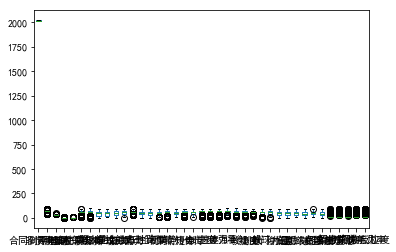

In [404]:
df.plot(kind='box')

## 4. 重复值处理

In [405]:
df['姓名'].duplicated().any()

True

In [406]:
df = df.drop_duplicates(subset=['姓名'], keep='last')
df['姓名'].duplicated().any()

False

# 二、 数据分析

### 1. 将身高与体重处理成数值类型，便于分析

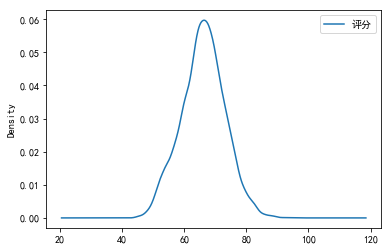

In [407]:
df[['身高', '体重', '评分']].plot(kind='kde')

In [408]:
df.loc[:, '身高'] = df.loc[:, '身高'].str.strip('cm').astype(np.int64)
df.loc[:, '体重'] = df.loc[:, '体重'].str.strip('kg').astype(np.int64)
df.loc[:, ['身高', '体重']].sample(10)

/opt/anaconda/envs/Version_36/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,身高,体重
3520,180,67
11909,177,72
8105,183,73
13151,187,82
16509,170,66
7146,183,70
114,172,68
6106,187,73
8257,173,72
6241,183,79


In [409]:
df

,姓名,国籍,所在俱乐部,加入俱乐部时间,合同到期时间,评分,身高,体重,擅长左（右）脚,出生日期,...,远射,弧线,任意球精准度,点球,凌空能力,门将位置感,扑救能力,门将踢球能力,扑球脱手几率,门将反应度
0,Cristiano Ronaldo,Portugal,Real Madrid,07/01/2009,2021.0,94,185,80,Right,02/05/1985,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,FC Barcelona,07/01/2004,2018.0,93,170,72,Left,06/24/1987,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,FC Barcelona,07/01/2013,2021.0,92,174,68,Right,02/05/1992,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,FC Barcelona,07/11/2014,2021.0,92,182,85,Right,01/24/1987,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,FC Bayern,07/01/2011,2021.0,92,193,92,Right,03/27/1986,...,16,14,11,47,11,91,89,95,90,89
5,De Gea,Spain,Manchester Utd,07/01/2011,2019.0,90,193,82,Right,11/07/1990,...,12,21,19,40,13,86,88,87,85,90
6,Robert Lewandowski,Poland,FC Bayern,07/01/2014,2021.0,90,185,79,Right,08/21/1988,...,82,77,76,81,86,8,15,12,6,10
7,Gareth Bale,Wales,Real Madrid,09/02/2013,2022.0,90,183,74,Left,07/16/1989,...,90,86,85,76,76,5,15,11,15,6
8,Zlatan Ibrahimović,Sweden,Manchester Utd,07/01/2016,2017.0,90,195,95,Right,10/03/1981,...,88,82,82,91,93,9,13,10,15,12
9,Thibaut Courtois,Belgium,Chelsea,07/26/2011,2019.0,89,199,91,Left,05/11/1992,...,17,19,11,27,12,86,84,69,91,89


### 2. 运动员的身高，体重，评分信息分布。

Text(0, 0.5, '体重')

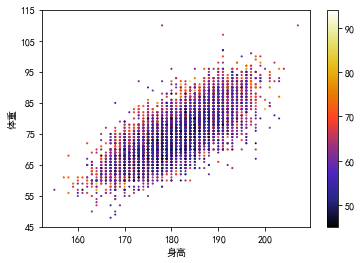

In [410]:

cm = plt.cm.get_cmap('CMRmap')
sc = plt.scatter(x=df['身高'], 
                 y=df['体重'], 
                 c=df['评分'] ,
                 s=df['评分']/50, 
                 cmap=cm)
plt.colorbar(sc)
plt.yticks(np.linspace(45, 115, 8))
plt.xlabel('身高')
plt.ylabel('体重')

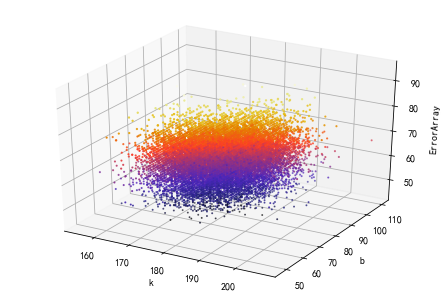

In [411]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import pylab as p
import mpl_toolkits.mplot3d.axes3d as p3

# k,b=np.mgrid[150:210:100j, 45:115:100j]
# f_kb=3*k**2+2*b+1
x=df['身高']
y=df['体重']
c=df['评分']

fig=p.figure()
ax=p3.Axes3D(fig)
ax.scatter(x, y, c,  
           c=df['评分'] ,
           s=df['评分']/50, 
           cmap=cm)
ax.set_xlabel('k')
ax.set_ylabel('b')
ax.set_zlabel('ErrorArray')
p.show()


### 3. 左脚与右脚选手在数量上是否存在偏差？

Right    13312
Left      4028
Name: 擅长左（右）脚, dtype: int64

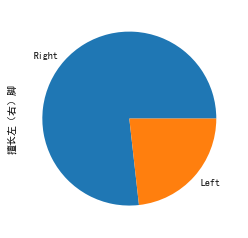

In [412]:
count_foot = df['擅长左（右）脚'].value_counts()
display(count_foot)
count_foot.plot.pie()

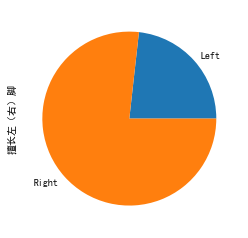

In [413]:
g = df.groupby('擅长左（右）脚')
g['擅长左（右）脚'].count().plot.pie()

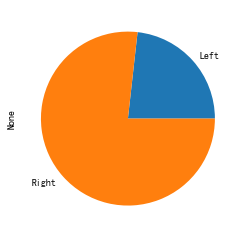

In [414]:
g = df.groupby('擅长左（右）脚')
g.size().plot.pie()

### 4. 从球员平均评分上考虑，拥有top10评分能力的俱乐部 / 国家。【超过20人】

#### Top10球员所在俱乐部

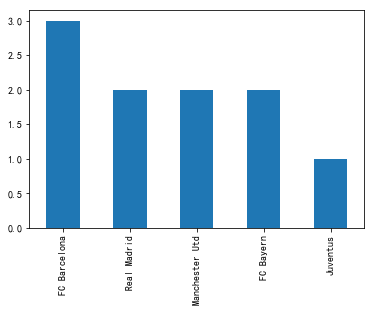

In [415]:
df.sort_values('评分', axis=0, ascending=False, inplace=False).iloc[:10].loc[:, '所在俱乐部'].value_counts().plot.bar()

#### 统计各个俱乐部的平均评分

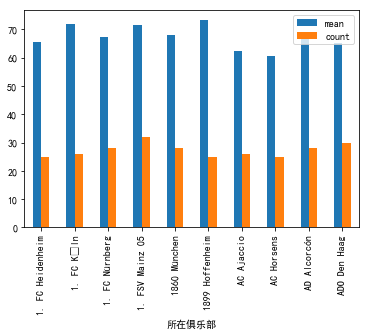

In [416]:
t = df.groupby('所在俱乐部')['评分'].agg(['mean', 'count'])
t[t['count'] > 20].head(10).plot.bar()

## 5. 哪个俱乐部拥有更多忠心的球员（5年及以上）？

#### 获取当前时间

In [417]:
import time 
import datetime 
#先获得时间数组格式的日期 
threeDayAgo = (datetime.datetime.now() - datetime.timedelta(days = 5*365)) 
#转换为时间戳: 
timeStamp = int(time.mktime(threeDayAgo.timetuple())) 
#转换为其他字符串格式: 
# strTime = threeDayAgo.strftime("%m/%d/%Y- %H:%M:%S") 
strTime = threeDayAgo.strftime("%Y/%m/%d") 
strTime

'2013/11/10'

#### 获得索引

In [418]:
def fun(d):
    a, b, c = d.split('/')
    return ('/').join([c, a, b])
index = (df['加入俱乐部时间'].map(fun) > strTime) & (df['所在俱乐部'] != 'Free Agents')

#### 方法一：分组，统计每一组的个数

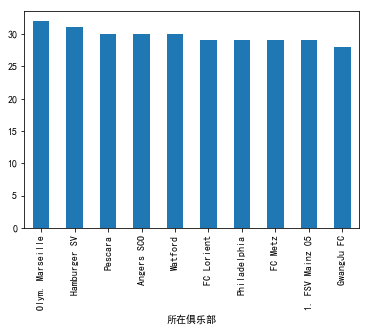

In [419]:
df[index].groupby('所在俱乐部').size().sort_values(ascending=False).head(10).plot.bar()

#### 方法二：使用 value_counts函数

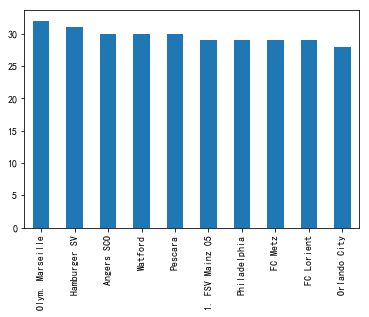

In [420]:
df.loc[index]['所在俱乐部'].value_counts().sort_values(ascending=False).head(10).plot.bar()

## 6. 足球运动员是否和出生日期有关

#### 获得年月日，分成三列

In [421]:
t = df['出生日期'].str.split('/', expand=True)

#### 年

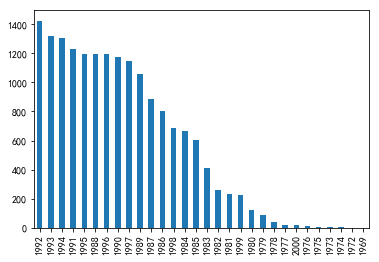

In [422]:
t[2].value_counts().plot(kind='bar')

#### 月

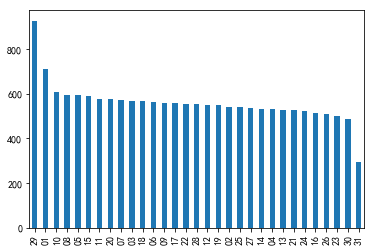

In [423]:
t[1].value_counts().plot(kind='bar')

#### 日

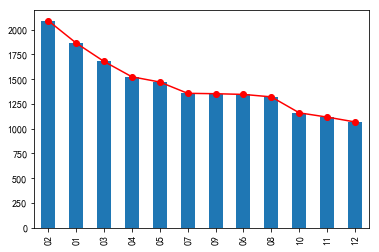

In [424]:
t[0].value_counts().plot(marker="o", color='red')
t[0].value_counts().plot(kind='bar')

## 7. 身高和体重是否有关

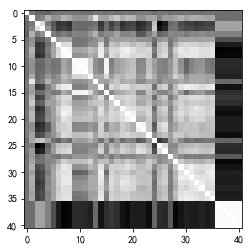

In [425]:
img = df.corr()
plt.imshow(img, cmap="gray")

In [426]:
display(img)

,合同到期时间,评分,身高,体重,年龄,非惯用脚使用频率,技术等级,控球技术,盘球（带球）能力,盯人能力,...,远射,弧线,任意球精准度,点球,凌空能力,门将位置感,扑救能力,门将踢球能力,扑球脱手几率,门将反应度
合同到期时间,1.000000,0.046951,-0.080202,-0.052723,-0.115877,0.003842,0.043006,0.032580,0.045917,0.013719,...,0.026892,0.008704,0.005690,0.018963,0.023032,-0.025378,-0.023631,-0.020675,-0.020552,-0.022510
评分,0.046951,1.000000,0.048049,0.140987,0.458306,0.228260,0.251734,0.463127,0.368933,0.235968,...,0.420161,0.420428,0.400154,0.339824,0.387290,-0.019402,-0.028935,-0.032484,-0.022146,-0.023688
身高,-0.080202,0.048049,1.000000,0.758834,0.075284,-0.180311,-0.430590,-0.400859,-0.482274,-0.041761,...,-0.362501,-0.421880,-0.379343,-0.320583,-0.332101,0.358089,0.357020,0.355361,0.359000,0.359710
体重,-0.052723,0.140987,0.758834,1.000000,0.222525,-0.136237,-0.375095,-0.337510,-0.412553,-0.030471,...,-0.274006,-0.342715,-0.293675,-0.245967,-0.258579,0.342312,0.340515,0.339408,0.341675,0.341691
年龄,-0.115877,0.458306,0.075284,0.222525,1.000000,0.086827,-0.014079,0.084754,0.006581,0.131631,...,0.151358,0.140644,0.197083,0.133294,0.135682,0.120384,0.102933,0.108149,0.111521,0.105126
非惯用脚使用频率,0.003842,0.228260,-0.180311,-0.136237,0.086827,1.000000,0.337948,0.367841,0.363443,0.027218,...,0.366120,0.359730,0.345285,0.341565,0.367267,-0.231983,-0.236083,-0.230589,-0.232685,-0.234851
技术等级,0.043006,0.251734,-0.430590,-0.375095,-0.014079,0.337948,1.000000,0.726441,0.761968,0.032176,...,0.679926,0.688390,0.634347,0.661515,0.700457,-0.607981,-0.610632,-0.605927,-0.606880,-0.609230
控球技术,0.032580,0.463127,-0.400859,-0.337510,0.084754,0.367841,0.726441,1.000000,0.930954,0.355139,...,0.831947,0.831312,0.763056,0.768221,0.789422,-0.776523,-0.780562,-0.776055,-0.776021,-0.777988
盘球（带球）能力,0.045917,0.368933,-0.482274,-0.412553,0.006581,0.363443,0.761968,0.930954,1.000000,0.228350,...,0.835897,0.839361,0.749690,0.765387,0.804477,-0.742053,-0.744287,-0.740302,-0.740917,-0.742285
盯人能力,0.013719,0.235968,-0.041761,-0.030471,0.131631,0.027218,0.032176,0.355139,0.228350,1.000000,...,0.116748,0.205926,0.233023,0.062811,0.013472,-0.492618,-0.496309,-0.495349,-0.495994,-0.496795


## 8. 年龄和评分

#### cut方法，bins可以传入整数类型，也可以用列表显式设置

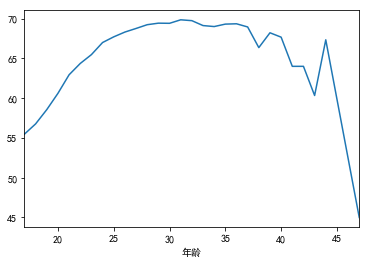

In [427]:
# t['年龄2'] = pd.cut(df['年龄'], bins=6, labels=range(1, 7)) # 按照最大值和最小值划分区间,前开后闭, 可以通过labels属性来显示具体的标签
df.groupby('年龄')['评分'].agg('mean').plot()